# 1定义函数及其导数，绘制双Y轴曲线

In [85]:
#数据类型：NDVI时序曲线
#实验目的：1.定义函数及其导数，绘制双Y轴曲线
#          1.1定义函数及其导数
#          1.2预处理数据：读取原始NDVI时序数据；定义变量，求解时序方程及其导数
#          1.3画图：绘制原始曲线、拟合曲线和导数曲线，双Y轴显示

In [67]:
import numpy as np
import pandas as pd
import sympy as sp
import math
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy import signal   #滤波等
import time
import ee
import geemap
import os
import brewer2mpl
from rich.progress import track
import matplotlib as mpl
import csv
os.environ ['HTTP_PROXY'] ='http://127.0.0.1:7890'
os.environ ['HTTPS_PROXY'] ='http://127.0.0.1:7890'
ee.Initialize()

## 1.1定义函数及其导数

In [2]:
a = 240.68568420410156
b = -4.687686443328857
c = -0.9298160076141357
d = 0.2455974966287613
#定义函数
def Harmonic(t):
    return a+b*t+c*np.cos(2*np.pi*t)+d*np.sin(2*np.pi*t)
#导数
def dy_Harmonic(t):
    return b-c*2*np.pi*np.sin(2*np.pi*t)+d*2*np.pi*np.cos(2*np.pi*t)
#sympy定义函数
x = sp.Symbol("x")
y = a+b*x+c*sp.cos(2*sp.pi*x)+d*sp.sin(2*sp.pi*x)
np_y=sp.lambdify('x',y,"numpy")#转为数组输入
dy = sp.diff(y,x,1)#1阶导数
np_dy=sp.lambdify('x',dy,"numpy")#转为数组输入

In [3]:
#定义输入变量
#创建时间范围内的数组
time = np.arange(ee.Date('2021-01-01').getInfo().get('value'),ee.Date('2021-05-15').getInfo().get('value'),86400000)
time_diff = []
Doy = []
#计算数组内每个时间与1970差值
for i in track(range(len(time))):
    date = ee.Date(int(time[i])).difference(ee.Date('1970-01-01'),'year').getInfo()
    doy =  ee.Date(int(time[i])).difference(ee.Date('2021-01-01'),'day').getInfo()
    time_diff.append(date)
    Doy.append(doy)
func_x = np.array(time_diff)

Output()

## 1.2求函数值

In [4]:
#求函数值
func_y1 = Harmonic(func_x)
func_y2 = np_y(func_x)
func_dy1 = dy_Harmonic(func_x)
func_dy2 = np_dy(func_x)

In [35]:
#读取原始NDVI值
NDVI = pd.read_csv(r'G:\数据恢复\2021工作\0325_野外实验设计\4_第二届数字地球大会\3_实验处理\9_出图V2\4_时序曲线\ee-chart.csv')
NDVI_x = np.array(NDVI['doy']-1)
NDVI_y = np.array(NDVI['NDVI_mean'])
NDVI_y[1] = 0.57

## 1.3画图

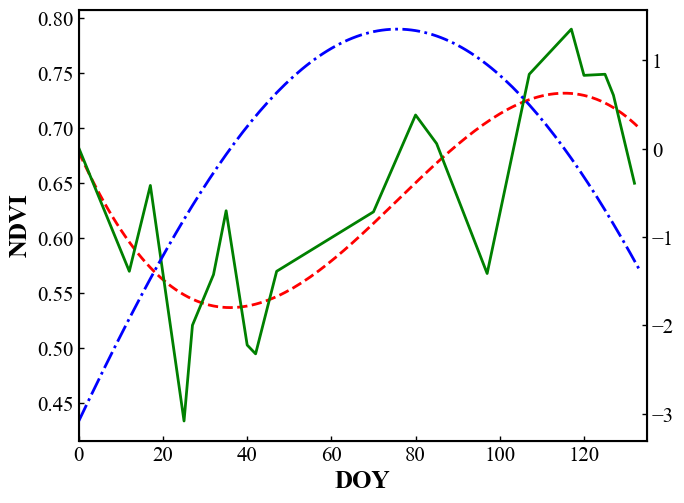

In [86]:
#画图
fig, ax1 = plt.subplots()
#拟合
plot1 = ax1.plot(Doy, func_y1,label='func_y1',color='r',linewidth=2,linestyle='--')
#原始
plot2 = ax1.plot(NDVI_x, NDVI_y,label='NDVIraw',color='g',linewidth=2)
#双Y轴图，共享x轴
ax2 = ax1.twinx() #双Y轴图，共享x轴
#导数
plot3 = ax2.plot(Doy, func_dy1,label='func_dy1',color='b',linewidth=2,linestyle='-.')
# plot4 = ax2.plot(Doy, func_dy2,label='func_dy2',color='b')

#参数设置
#设置XY轴标签
ax1.set_xlabel('DOY',size= 18,weight = 'bold')
ax1.set_ylabel('NDVI',size= 18,weight = 'bold') 
# ax2.set_ylabel('NDVI',size= 12,weight = 'bold')

#设置XY轴显示范围
# ax1.set_ylim(ymin = 0.4, ymax = 0.8)
ax1.set_xlim(xmin = 0, xmax = 135)
#XY轴刻度向内
ax1.tick_params(axis='x', which='both', direction='in',width=1,labelsize=15)#
ax1.tick_params(axis='y', which='both', direction='in',width=1,labelsize=15)#
ax2.tick_params(axis='y', which='both', direction='in',width=1,labelsize=15)#
#设置边框宽度
ax1.spines['bottom'].set_linewidth('1.5')#设置边框线宽为2.0
ax1.spines['top'].set_linewidth('1.5')#设置边框线宽为2.0
ax1.spines['right'].set_linewidth('1.5')#设置边框线宽为2.0
ax1.spines['left'].set_linewidth('1.5')#设置边框线宽为2.0
#图例
# ax1.legend(loc=4).get_frame().set_linewidth(0.0)
# ax2.legend(loc=3).get_frame().set_linewidth(0.0)
# lines = plot1+ plot2 + plot3
# ax1.legend(lines, [l.get_label() for l in lines],loc=4).get_frame().set_linewidth(0.0)
# #去除图片周围空白
plt.subplots_adjust(top=0.998, bottom=0.1, right=0.998, left=0.11, hspace=0, wspace=0)

# 获取所有的自带样式
# print(plt.style.available)
# 使用自带的样式进行美化
# plt.style.use("ggplot")
mpl.rcParams.update(mpl.rcParamsDefault)
# 使用自带的样式进行美化
#统一设置图片字体
plt.rc('font',family='Times new roman') #Times New Roman
#颜色选择
# bmap = brewer2mpl.get_map('Set3', 'qualitative', 4)
# colors = bmap.mpl_colors
# plt.rcParams['axes.color_cycle'] = colors

#保存和展示
plt.savefig('./NDVI_Time-seriesss.png', dpi=600)
plt.show()